In [1]:
import numpy as np
import matplotlib.pyplot as plt

from benchmark.himmelblau import Himmelblau
from benchmark.holder import Holder
from benchmark.sphere import Sphere

from optims.N_CMA_ES import CMA_ES
from optims.WOA import WOA

from optims.SBS import SBS

In [2]:
def create_bounds(min, max, dim):
    bounds = [(min, max) for _ in range(dim)]
    return np.array(bounds)

In [3]:
bounds = create_bounds(-10, 10, 2)

evals = np.linspace(100, 1_000_000, 10, dtype=int)

cma_results = []
woa_results = []

h = Holder()
f = lambda x: h(x) + 20
name = "Holder"

for num_evals in evals:
  m_0 = np.random.uniform(bounds[:, 0], bounds[:, 1])
  cma = CMA_ES(bounds, m_0, max_evals=num_evals)
  cma_results.append(cma.optimize(f)[0][1])

  woa = WOA(bounds, n_gen=30, n_sol=num_evals // 30)
  woa_results.append(woa.optimize(f)[0][1])

In [4]:
ns_particles = np.linspace(10, 2000, 10, dtype=int)

sbs_results = []

for n_particles in ns_particles:
  sbs = SBS(
    bounds,
    n_particles=n_particles,
    k_iter=[10_000],
    svgd_iter=300,
    sigma=1 / n_particles**2,
    lr=0.2
  )
  sbs_results.append(sbs.optimize(f)[0][1])

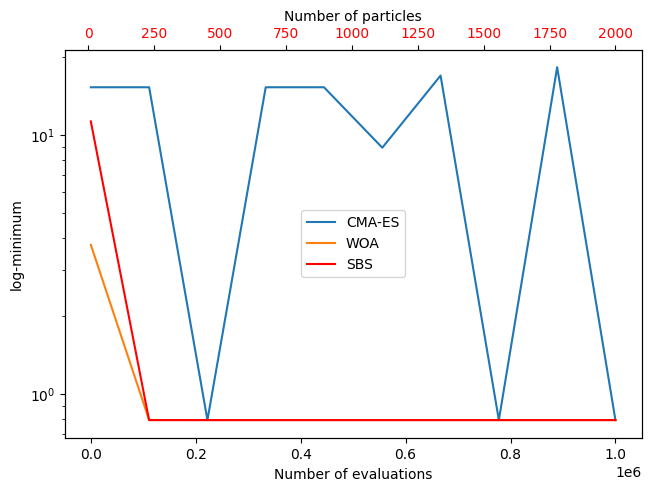

In [11]:
fig, ax = plt.subplots(layout='constrained')
ax.plot(evals, cma_results, label="CMA-ES")
ax.plot(evals, woa_results, label="WOA")
ax.plot([0], [0], label="SBS", c='r')
ax.set_xlabel("Number of evaluations")
ax.set_ylabel("log-minimum")
ax.set_yscale("log")

ax2 = ax.twiny()

ax2.plot(ns_particles, sbs_results, c='r')
ax2.set_xlabel("Number of particles")
ax2.tick_params(axis='x', labelcolor="red")

ax.legend()


In [6]:
ks = np.linspace(1, 10_000, 20, dtype=int)

sbs_results_k = []

for k in ks:
  sbs = SBS(
    bounds,
    n_particles=300,
    k_iter=[k],
    svgd_iter=300,
    sigma=1 / 300**2,
    lr=0.2
  )
  sbs_results_k.append(sbs.optimize(f)[0][1])

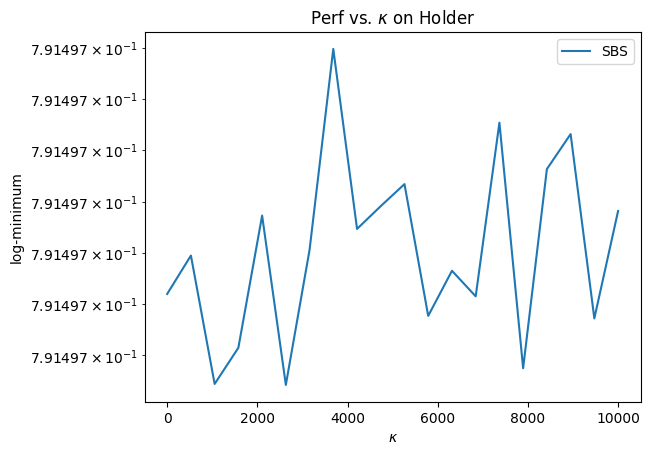

In [7]:
plt.plot(ks, sbs_results_k, label="SBS")
plt.xlabel("$\kappa$")
plt.ylabel("log-minimum")
plt.yscale("log")
plt.title(f"Perf vs. $\kappa$ on {name}")
plt.legend()